### Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install emoji
!pip install ftfy
!python -m pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Read data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data_01 = pd.read_csv("/content/drive/MyDrive/EC700/project/spam-data/Youtube01-Psy.csv")
data_02 = pd.read_csv("/content/drive/MyDrive/EC700/project/spam-data/Youtube02-KatyPerry.csv")
data_03 = pd.read_csv("/content/drive/MyDrive/EC700/project/spam-data/Youtube03-LMFAO.csv")
data_04 = pd.read_csv("/content/drive/MyDrive/EC700/project/spam-data/Youtube04-Eminem.csv")
data_05 = pd.read_csv("/content/drive/MyDrive/EC700/project/spam-data/Youtube05-Shakira.csv")

frames = [data_01, data_02, data_03, data_04, data_05]

data = pd.concat(frames)


print("done")

print(data.head())

data.to_csv("/content/drive/MyDrive/EC700/project/spam-data/Youtube.csv", index=False)

done
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  


## Explore features of Data

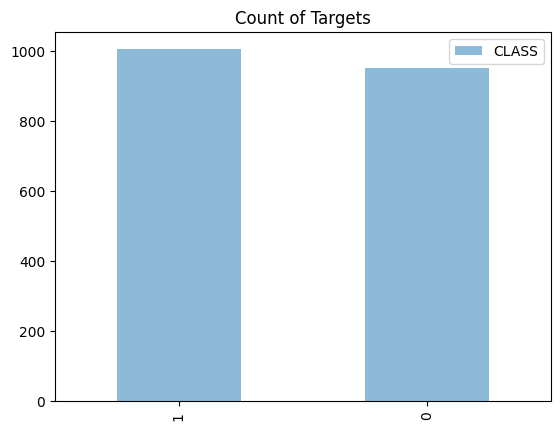

In [ ]:
import matplotlib.pyplot as plt
train_data = pd.read_csv("/content/drive/MyDrive/EC700/project/spam-data/Youtube.csv")
train_data['CLASS'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Targets")
plt.show()

Pretty equal between spam and no spam

(1956, 5)


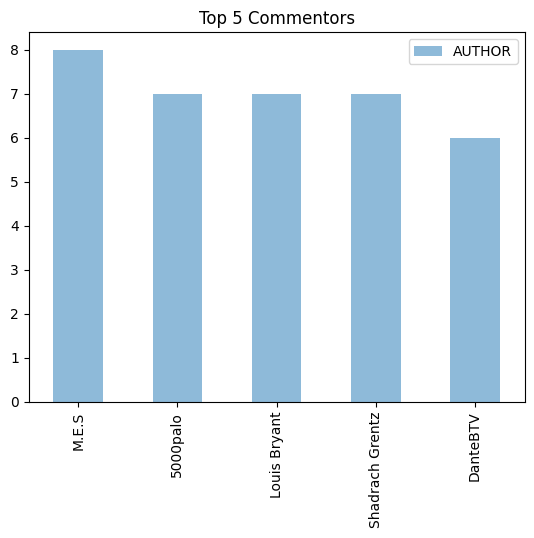

In [ ]:
print(train_data.shape)
train_data['AUTHOR'].value_counts().nlargest(5).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 5 Commentors")
plt.show()

the most frequent author has only 8 comments so the spam is pretty spread out in terms of having different author names

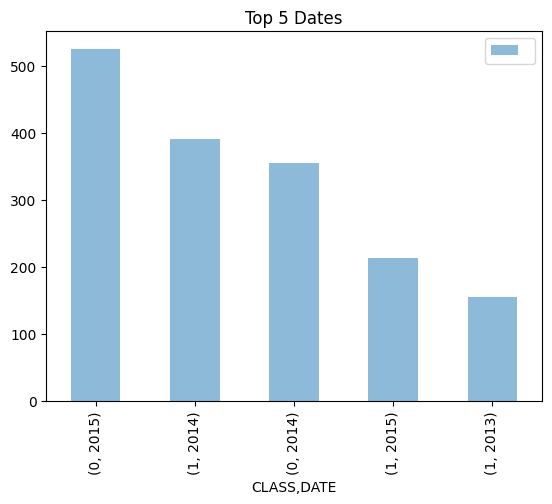

In [ ]:
train_data['DATE'] = train_data['DATE'].str[:4]
train_data[['DATE', 'CLASS']].groupby('CLASS').value_counts().nlargest(5).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 5 Dates")
plt.show()

Check for missing data

In [ ]:
print(data.shape)
print(data.isna().sum())

(1956, 5)
COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64


Replace na with blanks for date column if using it

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/EC700/project/spam-data/Youtube.csv")
data['DATE'].loc[data['DATE'].isna()] = ''
print('done')
data.drop(columns=['AUTHOR', 'DATE'], inplace=True)

done


<ipython-input-12-89e0606bba71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DATE'].loc[data['DATE'].isna()] = ''


Preprocess messages to extract features

In [ ]:
#Remove utf8 to latin1 enconsistencies
import ftfy
import emoji
is_emoji = []
for comment in data["CONTENT"]:
  comment = ftfy.fix_text(comment)
  if emoji.emoji_count(comment) > 0:
    is_emoji.append(True)
  else:
    is_emoji.append(False)
data["IS_EMOJI"] = is_emoji
print(data["CONTENT"])

0       Huh, anyway check out this you[tube] channel: ...
1       Hey guys check out my new channel and our firs...
2                  just for test I have to say murdev.com
3        me shaking my sexy ass on my channel enjoy ^_^ ﻿
4                 watch?v=vtaRGgvGtWQ   Check this out .﻿
                              ...                        
1951    I love this song because we sing it at Camp al...
1952    I love this song for two reasons: 1.it is abou...
1953                                                  wow
1954                              Shakira u are so wiredo
1955                           Shakira is the best dancer
Name: CONTENT, Length: 1956, dtype: object


In [ ]:
#Check if spam has links
data["IS_LINK"] = data["CONTENT"].str.contains('http://', regex=False)

In [ ]:
data

,COMMENT_ID,CONTENT,CLASS,IS_EMOJI,IS_LINK
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,"Huh, anyway check out this you[tube] channel: ...",1,False,False
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,Hey guys check out my new channel and our firs...,1,False,False
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,just for test I have to say murdev.com,1,False,False
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,False,False
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,watch?v=vtaRGgvGtWQ Check this out .﻿,1,False,False
...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,I love this song because we sing it at Camp al...,0,False,False
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,I love this song for two reasons: 1.it is abou...,0,False,False
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,wow,0,False,False
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Shakira u are so wiredo,0,False,False


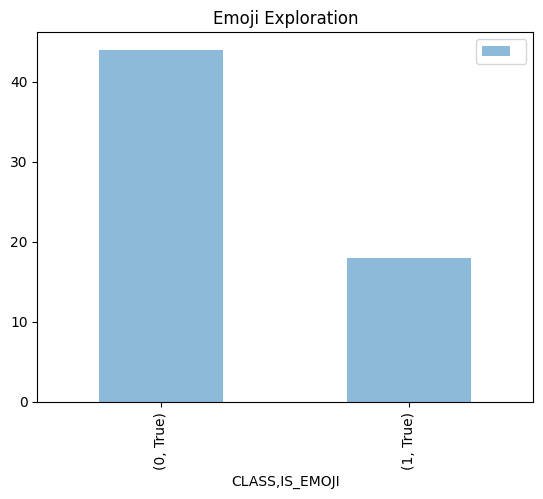

In [ ]:
data_plot = data.loc[data['IS_EMOJI'].eq(True)]
data_plot[['IS_EMOJI', 'CLASS']].groupby('CLASS').value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Emoji Exploration")
plt.show()

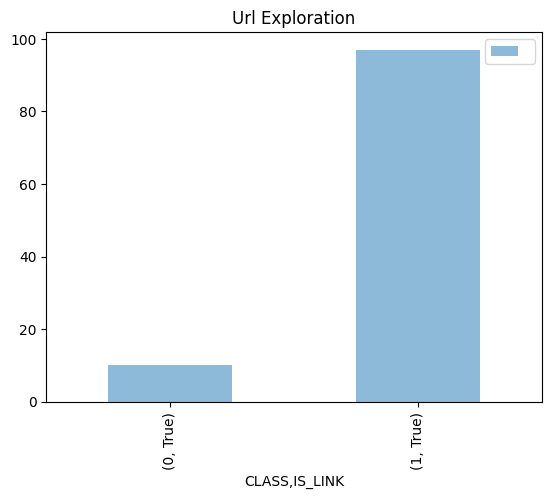

In [ ]:
data_plot = data.loc[data['IS_LINK'].eq(True)]
data_plot[['IS_LINK', 'CLASS']].groupby('CLASS').value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Url Exploration")
plt.show()

In [ ]:
data.to_excel("/content/drive/MyDrive/EC700/project/spam-data/Youtube_edit.xlsx", index=False)

## Process Features

### Split data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data['CONTENT'], data['CLASS'], test_size=0.2, random_state=0)

In [ ]:
# # One hot encoding
# from sklearn.preprocessing import OneHotEncoder
# num_ids = OneHotEncoder(sparse_output=True).fit(data[['COMMENT_ID']]).transform(data[['COMMENT_ID']])

In [ ]:
#TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(input='content', analyzer='word', stop_words='english')
text_train_matrix = vectorizer.fit_transform(X_train)
text_test_matrix = vectorizer.transform(X_test)

print('done')

done


Do stuff

## Create model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# train the model
model = MultinomialNB()
model.fit(text_train_matrix, Y_train)

MultinomialNB()

### Test model

In [ ]:
print("classifier accuracy {:.2f}%".format(model.score(text_test_matrix, Y_test) * 100))

classifier accuracy 88.78%


In [ ]:
labels = model.predict(text_test_matrix)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = Y_test.tolist()
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[154  29]
 [ 15 194]]
Accuracy Score : 0.8877551020408163
Report : 
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       183
           1       0.87      0.93      0.90       209

    accuracy                           0.89       392
   macro avg       0.89      0.88      0.89       392
weighted avg       0.89      0.89      0.89       392

F-Measure: 0.898


<Axes: >

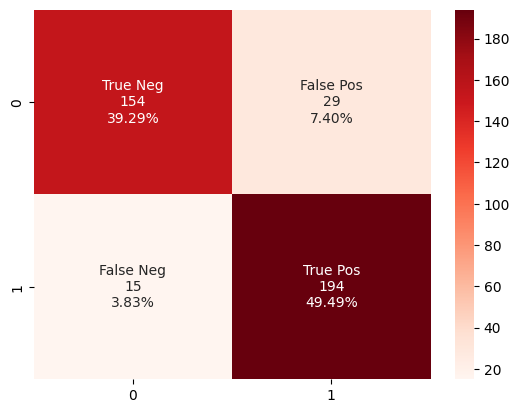

In [ ]:
#heatmap for confusion matrix
import seaborn as sns
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds')

In [ ]:
import statsmodels.api as sm
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/EC700/project/spam-data/Youtube_edit.xlsx")
y = data['CLASS']
x = data[['IS_EMOJI', 'IS_LINK']]
model = sm.OLS(y, x).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  CLASS   R-squared (uncentered):                   0.092
Model:                            OLS   Adj. R-squared (uncentered):              0.091
Method:                 Least Squares   F-statistic:                              98.64
Date:                Fri, 05 May 2023   Prob (F-statistic):                    1.54e-41
Time:                        02:36:21   Log-Likelihood:                         -2030.1
No. Observations:                1956   AIC:                                      4064.
Df Residuals:                    1954   BIC:                                      4075.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IS_EMOJI       0.2612      0.087      3.009      0.003       0.091       0.432
IS_LINK        0.9017      0.066     13.642      0.000       0.772       1.031
==============================================================================
Omnibus:                     8741.453   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.476
Skew:                           0.043   Prob(JB):                     3.67e-53
Kurtosis:                       1.281   Cond. No.                         1.32
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""